# Lab 2 - Vision por computadora

## 1. Explicar Hit or Miss

## 2. Trabajar con rice.jpg

In [1]:
from skimage.filters.thresholding import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image
import cv2 as cv

 a) Binarizar la imagen mediante el método de Otsu, o usando algún otro método no local.

131


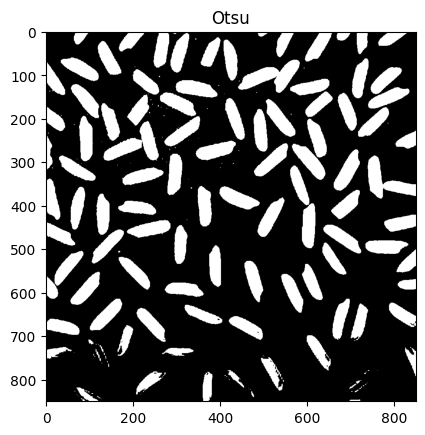

In [2]:
# Lectura imagen
rice = plt.imread('photos/rice.jpg')
rice = ski.color.rgb2gray(rice[:,:,:3])
# Conversion imagen 8
rice = (rice * 255).astype(np.uint8)
# Obtencion del threshold de Otsu
otsuTh = threshold_otsu(rice, 255)
print(otsuTh)
# Binarización de la imagen mediante Otsu
riceWithTh = 255 * ( rice >= otsuTh ).astype(np.uint8)
# Display de la imagen binarizada
plt.title("Otsu")
plt.imshow(riceWithTh, cmap='gray', vmin=0, vmax=255)
plt.show()

 b) Aplicar operaciones morfológicas adecuadas para limpiar el ruido de la binarización. Explicar porqué está eligiendo estas transformaciones morfológicas.

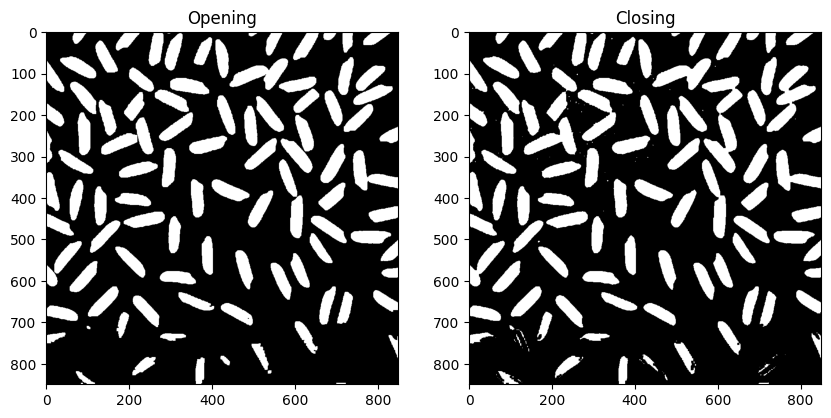

In [6]:
kernel = np.ones((5, 5), np.uint8)  # You can adjust the size of the kernel
riceOpening = cv.morphologyEx(riceWithTh, cv.MORPH_OPEN, kernel)
riceClosing = cv.morphologyEx(riceWithTh, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Opening")
plt.imshow(riceOpening, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Closing")
plt.imshow(riceClosing, cmap='gray', vmin=0, vmax=255)
plt.show()

Se aplica un opening porque primero se necesita erosionar para que se elimine el ruido provocado por el threshold de Otsu, de manera que se elimina ese set de puntos que aparece, así mismo, se aplica la dilatación para que los arroces que quedaron se agranden y que sean más claros. Sin embargo, al comparar con closing se puede observar que en el caso del closing tal vez mantiene 

c) Aplicar un algoritmo de componentes conexas sobre la binarización y contar cuántos granos de arroz hay en la imagen.